In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("Music.csv")       #csv file reading
df.head()                         #top 5 entries


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,9/25/1928,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [ ]:
#Useful columns extaction 
MusicDf=df[['id',
        'acousticness',  
        'danceability', 
        'energy', 
        'liveness', 
        'loudness', 
        'popularity', 
        'speechiness', 
        'tempo', 
        'valence']]
MusicDf.head()

,id,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence
0,6KbQ3uYMLKb5jDxLF7wYDD,0.995,0.708,0.1950,0.1510,-12.428,0,0.0506,118.469,0.7790
1,6KuQTIu1KoTTkLXKrwlLPV,0.994,0.379,0.0135,0.0763,-28.454,0,0.0462,83.972,0.0767
2,6L63VW0PibdM1HDSBoqnoM,0.604,0.749,0.2200,0.1190,-19.924,0,0.9290,107.177,0.8800
3,6M94FkXd15sOAOQYRnWPN8,0.995,0.781,0.1300,0.1110,-14.734,0,0.0926,108.003,0.7200
4,6N6tiFZ9vLTSOIxkj8qKrd,0.990,0.210,0.2040,0.0980,-16.829,1,0.0424,62.149,0.0693


# Music-Music Similarity Using Cosine

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

MusicSimilarityDf=MusicDf.copy()
#target song ID
id='6KbQ3uYMLKb5jDxLF7wYDD'
#row extraction for target song
musicRow=MusicSimilarityDf[MusicSimilarityDf['id']==id]
#adding column in data frame that will calculate cosine similarity of all rows from target music id
MusicSimilarityDf['cos_sim'] = cosine_similarity(MusicSimilarityDf.iloc[:,1:10], musicRow.iloc[:,1:]).reshape(-1)
MusicSimilarityDf.head()

,id,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,cos_sim
0,6KbQ3uYMLKb5jDxLF7wYDD,0.995,0.708,0.1950,0.1510,-12.428,0,0.0506,118.469,0.7790,1.000000
1,6KuQTIu1KoTTkLXKrwlLPV,0.994,0.379,0.0135,0.0763,-28.454,0,0.0462,83.972,0.0767,0.975399
2,6L63VW0PibdM1HDSBoqnoM,0.604,0.749,0.2200,0.1190,-19.924,0,0.9290,107.177,0.8800,0.996821
3,6M94FkXd15sOAOQYRnWPN8,0.995,0.781,0.1300,0.1110,-14.734,0,0.0926,108.003,0.7200,0.999516
4,6N6tiFZ9vLTSOIxkj8qKrd,0.990,0.210,0.2040,0.0980,-16.829,1,0.0424,62.149,0.0693,0.987079


# Music-Music Similarity Using Euclidean

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
#adding column in data frame that will calculate euclidean distance of all rows from target music id
MusicSimilarityDf["Euclidean Distance"]=euclidean_distances(MusicSimilarityDf.iloc[:,1:10],musicRow.iloc[:1,1:])
MusicSimilarityDf.head()

,id,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,cos_sim,Euclidean Distance
0,6KbQ3uYMLKb5jDxLF7wYDD,0.995,0.708,0.1950,0.1510,-12.428,0,0.0506,118.469,0.7790,1.000000,0.000000
1,6KuQTIu1KoTTkLXKrwlLPV,0.994,0.379,0.0135,0.0763,-28.454,0,0.0462,83.972,0.0767,0.975399,38.046231
2,6L63VW0PibdM1HDSBoqnoM,0.604,0.749,0.2200,0.1190,-19.924,0,0.9290,107.177,0.8800,0.996821,13.588130
3,6M94FkXd15sOAOQYRnWPN8,0.995,0.781,0.1300,0.1110,-14.734,0,0.0926,108.003,0.7200,0.999516,10.717798
4,6N6tiFZ9vLTSOIxkj8qKrd,0.990,0.210,0.2040,0.0980,-16.829,1,0.0424,62.149,0.0693,0.987079,56.507220


# Music-Music Similarity Using Manhatten

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances
#adding column in data frame that will calculate manhatten distance of all rows from target music id
MusicSimilarityDf['manhatten distance'] = manhattan_distances(MusicSimilarityDf.iloc[:,1:10], musicRow.iloc[:,1:]).reshape(-1)
MusicSimilarityDf.head()

,id,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,cos_sim,Euclidean Distance,manhatten distance
0,6KbQ3uYMLKb5jDxLF7wYDD,0.995,0.708,0.1950,0.1510,-12.428,0,0.0506,118.469,0.7790,1.000000,0.000000,0.0000
1,6KuQTIu1KoTTkLXKrwlLPV,0.994,0.379,0.0135,0.0763,-28.454,0,0.0462,83.972,0.0767,0.975399,38.046231,51.8159
2,6L63VW0PibdM1HDSBoqnoM,0.604,0.749,0.2200,0.1190,-19.924,0,0.9290,107.177,0.8800,0.996821,13.588130,20.2564
3,6M94FkXd15sOAOQYRnWPN8,0.995,0.781,0.1300,0.1110,-14.734,0,0.0926,108.003,0.7200,0.999516,10.717798,13.0510
4,6N6tiFZ9vLTSOIxkj8qKrd,0.990,0.210,0.2040,0.0980,-16.829,1,0.0424,62.149,0.0693,0.987079,56.507220,63.0039


# Music-Music Similarity Using Jaccard

In [ ]:
from scipy.spatial.distance import jaccard
#adding column in data frame that will calculate jaccard distance of all rows from target music id
MusicSimilarityDf['jaccard similarity'] = MusicSimilarityDf.apply(lambda _df: jaccard(_df.iloc[1:10], musicRow.iloc[:,1:]),axis=1)
MusicSimilarityDf.head()

,id,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,cos_sim,Euclidean Distance,manhatten distance,jaccard similarity
0,6KbQ3uYMLKb5jDxLF7wYDD,0.995,0.708,0.1950,0.1510,-12.428,0,0.0506,118.469,0.7790,1.000000,0.000000,0.0000,0.000
1,6KuQTIu1KoTTkLXKrwlLPV,0.994,0.379,0.0135,0.0763,-28.454,0,0.0462,83.972,0.0767,0.975399,38.046231,51.8159,1.000
2,6L63VW0PibdM1HDSBoqnoM,0.604,0.749,0.2200,0.1190,-19.924,0,0.9290,107.177,0.8800,0.996821,13.588130,20.2564,1.000
3,6M94FkXd15sOAOQYRnWPN8,0.995,0.781,0.1300,0.1110,-14.734,0,0.0926,108.003,0.7200,0.999516,10.717798,13.0510,0.875
4,6N6tiFZ9vLTSOIxkj8qKrd,0.990,0.210,0.2040,0.0980,-16.829,1,0.0424,62.149,0.0693,0.987079,56.507220,63.0039,1.000


# Ranking

In [ ]:
#sorting on the basis of Euclidean distance
MusicSimilarityDf.sort_values(by='Euclidean Distance',  inplace=True)
#top 5 similar musics
MusicSimilarityDf[MusicSimilarityDf['id']!=id].head(5)


,id,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,cos_sim,Euclidean Distance,manhatten distance,jaccard similarity
144599,6Z08Y96F03ie9ZrEyHOmSf,0.994,0.805,0.186,0.3370,-12.318,0,0.0908,118.465,0.724,0.999998,0.246666,0.5022,1.000
144368,7Lso8N7neAZPmrVdw6MeVo,0.996,0.793,0.242,0.0890,-12.461,0,0.0771,118.622,0.617,0.999999,0.254408,0.5695,1.000
107442,1Ax1gc1JPa9K83kqu4ZsZ2,0.995,0.821,0.263,0.1100,-12.663,0,0.2390,118.578,0.897,0.999996,0.368237,0.8724,0.875
88503,1nPve3dpMWZ8wLzcZRN2S3,0.994,0.885,0.154,0.0944,-12.723,0,0.0759,118.571,0.850,0.999996,0.373262,0.7689,1.000
98993,2DR22iZVrGugktQG2Dh44d,0.992,0.527,0.234,0.1160,-12.093,0,0.0615,118.400,0.773,0.999995,0.390713,0.6789,1.000


# Artist-Artist Similarity using Euclidean

In [ ]:
#Target artist
artistName="['Carl Woitschach']"

ArtistSimilarityDf=MusicDf.copy()
#dataframe for artists
ArtistSimilarityDf[["artists", "name"]]=df[["artists", "name"]]
#grouping all the similar artist and merging them to single row by their mean values for all columns
ArtistSimilarityDf=ArtistSimilarityDf.groupby('artists' ,as_index=False).mean()
#target artist row extraction
targetArtist=ArtistSimilarityDf[ArtistSimilarityDf["artists"]==artistName]
#adding column in data frame that will calculate euclidean distance of all rows from target artist
ArtistSimilarityDf["Euclidean Distance"]=euclidean_distances(ArtistSimilarityDf.iloc[:,1:10], targetArtist.iloc[:1,1:10])
ArtistSimilarityDf.head()


,artists,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,Euclidean Distance
0,"[""'In The Heights' Original Broadway Company"",...",0.848000,0.397000,0.24200,0.106000,-10.754000,54.000,0.06630,171.74700,0.144000,77.541520
1,"[""'In The Heights' Original Broadway Company""]",0.553000,0.664500,0.62800,0.265900,-6.228500,46.500,0.09185,102.24350,0.652000,48.607097
2,"[""'Legally Blonde' Ensemble"", 'Michael Rupert'...",0.404000,0.718000,0.53300,0.082800,-9.883000,48.000,0.46200,119.25000,0.683000,48.116394
3,"[""'Legally Blonde' Ensemble"", 'Michael Rupert']",0.647000,0.578000,0.29300,0.334000,-12.594000,44.000,0.47900,139.60900,0.510000,50.009823
4,"[""'Til Tuesday""]",0.105556,0.557125,0.61225,0.127588,-9.638125,35.125,0.03215,103.08025,0.532625,37.490614


#  Artist-Artist Similarity using Cosine

In [ ]:
#adding column in data frame that will calculate cosine similarity of all rows from target artist
ArtistSimilarityDf['cos_sim'] = cosine_similarity(ArtistSimilarityDf.iloc[:,1:10], targetArtist.iloc[:,1:]).reshape(-1)
ArtistSimilarityDf.head()


,artists,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,Euclidean Distance,cos_sim
0,"[""'In The Heights' Original Broadway Company"",...",0.848000,0.397000,0.24200,0.106000,-10.754000,54.000,0.06630,171.74700,0.144000,77.541520,0.954002
1,"[""'In The Heights' Original Broadway Company""]",0.553000,0.664500,0.62800,0.265900,-6.228500,46.500,0.09185,102.24350,0.652000,48.607097,0.910461
2,"[""'Legally Blonde' Ensemble"", 'Michael Rupert'...",0.404000,0.718000,0.53300,0.082800,-9.883000,48.000,0.46200,119.25000,0.683000,48.116394,0.928083
3,"[""'Legally Blonde' Ensemble"", 'Michael Rupert']",0.647000,0.578000,0.29300,0.334000,-12.594000,44.000,0.47900,139.60900,0.510000,50.009823,0.954002
4,"[""'Til Tuesday""]",0.105556,0.557125,0.61225,0.127588,-9.638125,35.125,0.03215,103.08025,0.532625,37.490614,0.946827


# Artist-Artist Similarity using Manhatten

In [ ]:
#adding column in data frame that will calculate manhatten distance of all rows from target artist
ArtistSimilarityDf['manhatten distance'] = manhattan_distances(ArtistSimilarityDf.iloc[:,1:10], targetArtist.iloc[:,1:]).reshape(-1)
ArtistSimilarityDf.head()

,artists,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,Euclidean Distance,cos_sim,manhatten distance
0,"[""'In The Heights' Original Broadway Company"",...",0.848000,0.397000,0.24200,0.106000,-10.754000,54.000,0.06630,171.74700,0.144000,77.541520,0.954002,112.819814
1,"[""'In The Heights' Original Broadway Company""]",0.553000,0.664500,0.62800,0.265900,-6.228500,46.500,0.09185,102.24350,0.652000,48.607097,0.910461,63.828536
2,"[""'Legally Blonde' Ensemble"", 'Michael Rupert'...",0.404000,0.718000,0.53300,0.082800,-9.883000,48.000,0.46200,119.25000,0.683000,48.116394,0.928083,53.430476
3,"[""'Legally Blonde' Ensemble"", 'Michael Rupert']",0.647000,0.578000,0.29300,0.334000,-12.594000,44.000,0.47900,139.60900,0.510000,50.009823,0.954002,72.474905
4,"[""'Til Tuesday""]",0.105556,0.557125,0.61225,0.127588,-9.638125,35.125,0.03215,103.08025,0.532625,37.490614,0.946827,50.359938


# Artist-Artist Similarity using Jaccard

In [ ]:
#adding column in data frame that will calculate jaccard distance of all rows from target artist
ArtistSimilarityDf['jaccard distance'] = ArtistSimilarityDf.apply(lambda _df: jaccard(_df.iloc[1:10], targetArtist.iloc[:,1:]),axis=1)
ArtistSimilarityDf.head()

,artists,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,Euclidean Distance,cos_sim,manhatten distance,jaccard distance
0,"[""'In The Heights' Original Broadway Company"",...",0.848000,0.397000,0.24200,0.106000,-10.754000,54.000,0.06630,171.74700,0.144000,77.541520,0.954002,112.819814,1.0
1,"[""'In The Heights' Original Broadway Company""]",0.553000,0.664500,0.62800,0.265900,-6.228500,46.500,0.09185,102.24350,0.652000,48.607097,0.910461,63.828536,1.0
2,"[""'Legally Blonde' Ensemble"", 'Michael Rupert'...",0.404000,0.718000,0.53300,0.082800,-9.883000,48.000,0.46200,119.25000,0.683000,48.116394,0.928083,53.430476,1.0
3,"[""'Legally Blonde' Ensemble"", 'Michael Rupert']",0.647000,0.578000,0.29300,0.334000,-12.594000,44.000,0.47900,139.60900,0.510000,50.009823,0.954002,72.474905,1.0
4,"[""'Til Tuesday""]",0.105556,0.557125,0.61225,0.127588,-9.638125,35.125,0.03215,103.08025,0.532625,37.490614,0.946827,50.359938,1.0


# Ranking

In [ ]:
#sorting on the basis of Euclidean Distance
ArtistSimilarityDf.sort_values(by='Euclidean Distance',  inplace=True)
#top 5 similar artists
ArtistSimilarityDf[ArtistSimilarityDf['artists']!=artistName].head(5)

,artists,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,Euclidean Distance,cos_sim,manhatten distance,jaccard distance
20866,['Miss Rekha'],0.9900,0.5350,0.193,0.20600,-9.2350,0.0,0.05060,116.2510,0.5670,0.486138,0.999992,1.048543,1.0
33137,['Δημήτρης Λαβίδας'],0.9650,0.6130,0.295,0.54900,-8.7270,0.0,0.24100,115.9460,0.8610,0.493139,0.999993,1.216095,1.0
27783,['Suman Hemady'],0.9240,0.4590,0.425,0.21300,-9.3240,0.0,0.04810,116.4050,0.6120,0.545048,0.999992,1.144043,1.0
9716,"['Francisco Canaro', 'Enrique Lucero']",0.9471,0.4478,0.369,0.20063,-8.4774,0.0,0.04248,115.7859,0.4777,0.661588,0.999989,1.451752,1.0
33203,['Μαρίκα Φραντζεσκοπούλου'],0.9875,0.4170,0.298,0.24100,-9.0415,0.0,0.04435,115.5950,0.4805,0.675076,0.999994,1.345293,1.0


# Similar Music to target Artist 

In [ ]:
#Similar music for target Artist
musicToArtist=MusicDf.copy()
musicToArtist[["artists", "name"]]=df[["artists", "name"]]
# top 5 other musics by the same artist
musicToArtist[musicToArtist["artists"]==artistName][["artists", "name"]].head(5)


,artists,name
0,['Carl Woitschach'],Singende Bataillone 1. Teil
7,['Carl Woitschach'],Per aspera ad astra
8200,['Carl Woitschach'],Singende Bataillone 2. Teil
8203,['Carl Woitschach'],"Lore, Lore, Lore"
8227,['Carl Woitschach'],Reserve hat Ruh 2. Teil


#  Top 10 Recommendation for target artist 

In [ ]:
# Recommendation System
#target artist
artistName= "['Carl Woitschach']"
#Row extraction for target artist
targetArtist=ArtistSimilarityDf[ArtistSimilarityDf["artists"]==artistName]
# Euclidean Distance from others
ArtistSimilarityDf["Euclidean Distance"]=euclidean_distances(ArtistSimilarityDf.iloc[:,1:10], targetArtist.iloc[:1,1:10])
# Cosine Similarity from others
ArtistSimilarityDf['cos_sim'] = cosine_similarity(ArtistSimilarityDf.iloc[:,1:10], targetArtist.iloc[:,1:10]).reshape(-1)
# manhatten Distance from others
ArtistSimilarityDf['manhatten distance'] = manhattan_distances(ArtistSimilarityDf.iloc[:,1:10], targetArtist.iloc[:,1:10]).reshape(-1)
# Jaccard distance frrom others
ArtistSimilarityDf['jaccard distance'] = ArtistSimilarityDf.apply(lambda _df: jaccard(_df.iloc[1:10], targetArtist.iloc[:,1:10]),axis=1)
#sort by  Euclidean distance
ArtistSimilarityDf.sort_values(by='Euclidean Distance',  inplace=True)
# top 10 similar artists , and showing their all 4 distance details from target artist
recommendationDataframe=ArtistSimilarityDf.iloc[1:10,[0,10,11,12,13]]
recommendationDataframe



,artists,Euclidean Distance,cos_sim,manhatten distance,jaccard distance
20866,['Miss Rekha'],0.486138,0.999992,1.048543,1.0
33137,['Δημήτρης Λαβίδας'],0.493139,0.999993,1.216095,1.0
27783,['Suman Hemady'],0.545048,0.999992,1.144043,1.0
9716,"['Francisco Canaro', 'Enrique Lucero']",0.661588,0.999989,1.451752,1.0
33203,['Μαρίκα Φραντζεσκοπούλου'],0.675076,0.999994,1.345293,1.0
10945,"['Georgia Mitaki', 'Seavastakis', 'Klarino']",0.712022,0.999993,1.472467,1.0
22624,['P. Leela'],0.755506,0.999979,1.614943,1.0
31145,['Vasanti'],0.795742,0.999977,1.362660,1.0
9733,"['Francisco Canaro', 'Nelly Omar']",0.833047,0.999996,1.438981,1.0


# Graphs for


1.   Euclidean
2.   Cosine
3. Manhatten
4. jaccard



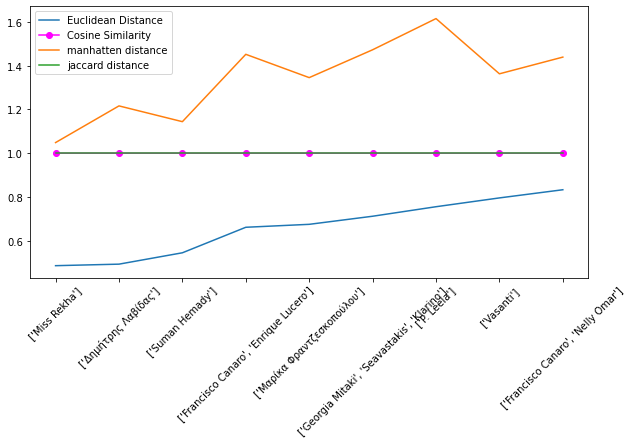

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(recommendationDataframe['artists'], recommendationDataframe["Euclidean Distance"], label="Euclidean Distance")
plt.plot(recommendationDataframe['artists'], recommendationDataframe["cos_sim"],color='magenta',marker='o', label="Cosine Similarity")
plt.plot(recommendationDataframe['artists'], recommendationDataframe["manhatten distance"], label="manhatten distance")
plt.plot(recommendationDataframe['artists'], recommendationDataframe["jaccard distance"], label="jaccard distance")
plt.legend()
plt.xticks(rotation=45 )

plt.show()

### From the above grapgh it can be seen clearly that euclidean line is growing straight and there are no sudden decreasing points like 'manhatten distance values'. Also, cosine and jaccard shows overlapping and non-overlapping suggestions. 
## Thus Euclidean is most accurate of all.